# Examen final de Desarrollo de Aplicaciones para la Visualización de Datos

Nombre: Eva

Apellidos: Calvo-Sotelo

Tiempo: 2 horas y 30 minutos

## Contexto del ejercicio

El Ayuntamiento de Madrid desea entender en más detalle la situación del problema habitacional en la ciudad de Madrid basada en múltiples fuentes de datos como alquiler vacacional, evolución del precio de alquiler, inflacción y densidad poblacional.

El objetivo del análisis es buscar patrones para entender mejor que está sucediendo, que barrios son los más estresados y que factores son que hacen que el precio de la vivienda esté en máximos. Por lo tanto, se pide:

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)
2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)
3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)
4. Concluir todo este análisis haciendo un informe con 2 páginas como mínimo que incluya, preguntas que se van a responder, dashboard resumen que sustente las preguntas y recomendaciones para mejorar la situación habitacional a partir de los resultados obtenidos de los análisis realizados con los datos. (3 Puntos)

## Juego de datos

Para realizar este análisis se provee un juego de datos con las siguientes variables:


| **Variable**           | **Descripción**                                                                                     | **Tipo**                 |
|-------------------------|-----------------------------------------------------------------------------------------------------|--------------------------|
| `neighbourhood_group`   | Grupo de vecindarios o distritos en Madrid.                                                        | Categórica               |
| `date`                 | Fecha de la observación en formato `YYYY-MM-DD`.                                                   | Temporal                 |
| `m2_price`             | Precio promedio por metro cuadrado en euros.                                                       | Cuantitativa continua     |
| `inflation`            | Inflación mensual como porcentaje (incremento en los precios al consumidor).                       | Cuantitativa continua     |
| `HICP`                 | Índice armonizado de precios al consumidor (indicador de inflación en la zona euro).               | Cuantitativa continua     |
| `population_density`   | Densidad de población anual por km² para toda la Comunidad de Madrid.                                                  | Cuantitativa continua     |
| `listings_count`       | Número total de propiedades listadas en Airbnb en un vecindario.                                   | Cuantitativa discreta     |
| `minimum_nights`       | Número mínimo de noches requerido para alquilar una propiedad.                                     | Cuantitativa discreta     |
| `nigth_price`          | Precio promedio por noche de las propiedades en Airbnb.                                            | Cuantitativa continua     |
| `availability_365`     | Número de días al año que una propiedad está disponible para alquilarse.                           | Cuantitativa discreta     |
| `listing_reviews`      | Número promedio de reseñas por propiedad listada.                                                 | Cuantitativa continua     |
| `number_of_reviews`    | Total acumulado de reseñas para todas las propiedades en un vecindario.                            | Cuantitativa discreta     |
| `reviews_per_month`    | Número promedio de reseñas recibidas por una propiedad al mes.                                     | Cuantitativa continua     |
| `hosts_count`          | Número de anfitriones activos en un vecindario.                                                   | Cuantitativa discreta     |
| `Private_room`         | Número de propiedades que ofrecen habitaciones privadas.                                           | Cuantitativa discreta     |
| `Entire_home`          | Número de propiedades que ofrecen viviendas completas.                                             | Cuantitativa discreta     |
| `Hotel_room`           | Número de propiedades categorizadas como habitaciones de hotel.                                    | Cuantitativa discreta     |
| `Shared_room`          | Número de propiedades que ofrecen habitaciones compartidas.                                        | Cuantitativa discreta     |


Ejemplos de preguntas que se pueden realizar a los datos:
1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?
2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?
3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?
4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?
5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?
6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

Nota:
- Puedes hacer group_by para sacar variables agregadas por fecha.
- Se valorará la creatividad en las hipótesis, soluciones y limpieza del código y visualizaciones.

## Entrega del exámen

Compartir Url de github con:
- notebook que responde a las preguntas 1, 2 y 3
- PDF respondiendo a la pregunta 4

Puedes entregar el exámen en el siguiente enlace:

https://forms.gle/xe3En2raC3C3UUY39


# Librerías necesarias

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


# Análisis descriptivos


In [3]:
data = pd.read_csv("housing_time_series_by_madrid_neighbourhood.csv")
data['date'] = pd.to_datetime(data['date'])
data.head()

,neighbourhood_group,date,m2_price,inflation,HICP,population_density,listings_count,minimum_nights,nigth_price,availability_365,listing_reviews,number_of_reviews,reviews_per_month,hosts_count,Private_room,Entire_home,Hotel_room,Shared_room
0,Centro,2010-08-01,15.3,0.3,1.6,796,1,2.0,114.000000,305.00,1,155.0,0.9000,1,0,1,0,0
1,Centro,2011-01-01,15.6,-0.7,3.0,800,1,2.0,114.000000,305.00,1,155.0,0.9000,1,0,1,0,0
2,Centro,2011-02-01,15.4,0.1,3.4,800,4,7.0,184.000000,44.25,4,100.0,0.5925,3,0,4,0,0
3,Centro,2011-05-01,15.0,0.0,3.4,800,5,9.6,61.000000,134.60,11,264.4,1.6120,4,1,4,0,0
4,Centro,2011-06-01,15.0,-0.1,3.0,800,5,5.4,135.333333,129.20,15,289.8,1.7680,4,1,4,0,0


1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?

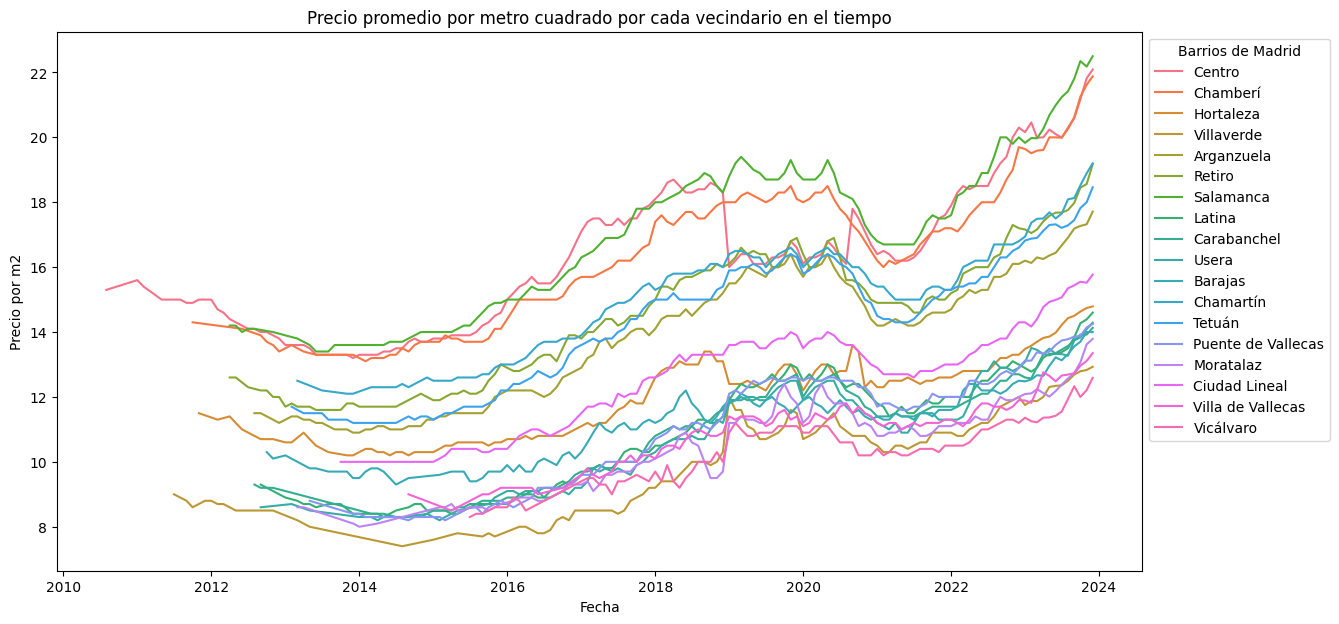

In [114]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='date', y='m2_price', hue='neighbourhood_group')
plt.title('Precio promedio por metro cuadrado por cada vecindario en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio por m2')
plt.legend(title='Barrios de Madrid',bbox_to_anchor=(1, 1, 0, 0))
plt.show()

2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?

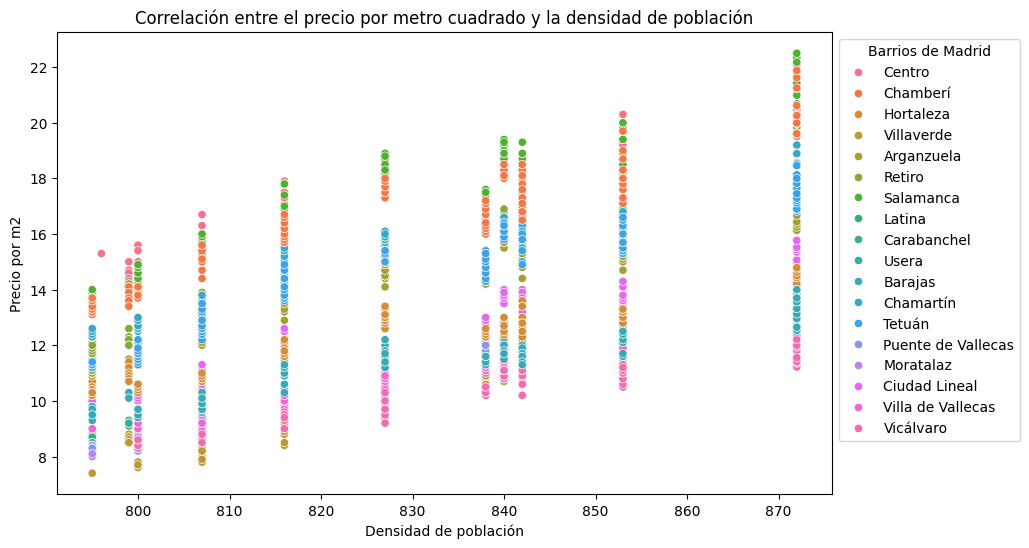

In [115]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='population_density', y='m2_price', hue='neighbourhood_group')
plt.title('Correlación entre el precio por metro cuadrado y la densidad de población')
plt.xlabel('Densidad de población')
plt.ylabel('Precio por m2')
plt.legend(title='Barrios de Madrid',bbox_to_anchor=(1, 1, 0, 0))
plt.show()

3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales?


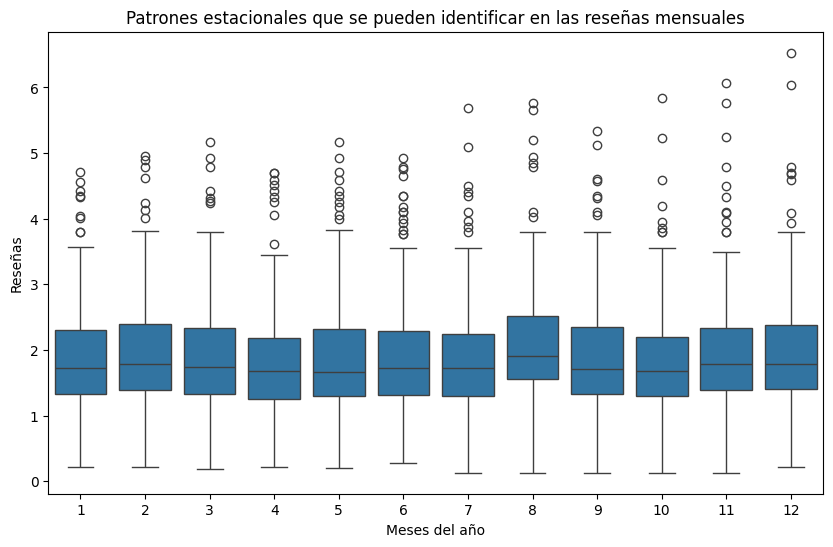

In [119]:
plt.figure(figsize=(10, 6))
data['month'] = data['date'].dt.month
sns.boxplot(data=data, x='month', y='reviews_per_month')
plt.title('Patrones estacionales que se pueden identificar en las reseñas mensuales')
plt.xlabel('Meses del año')
plt.ylabel('Reseñas')
plt.show()

4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con cada barrio?

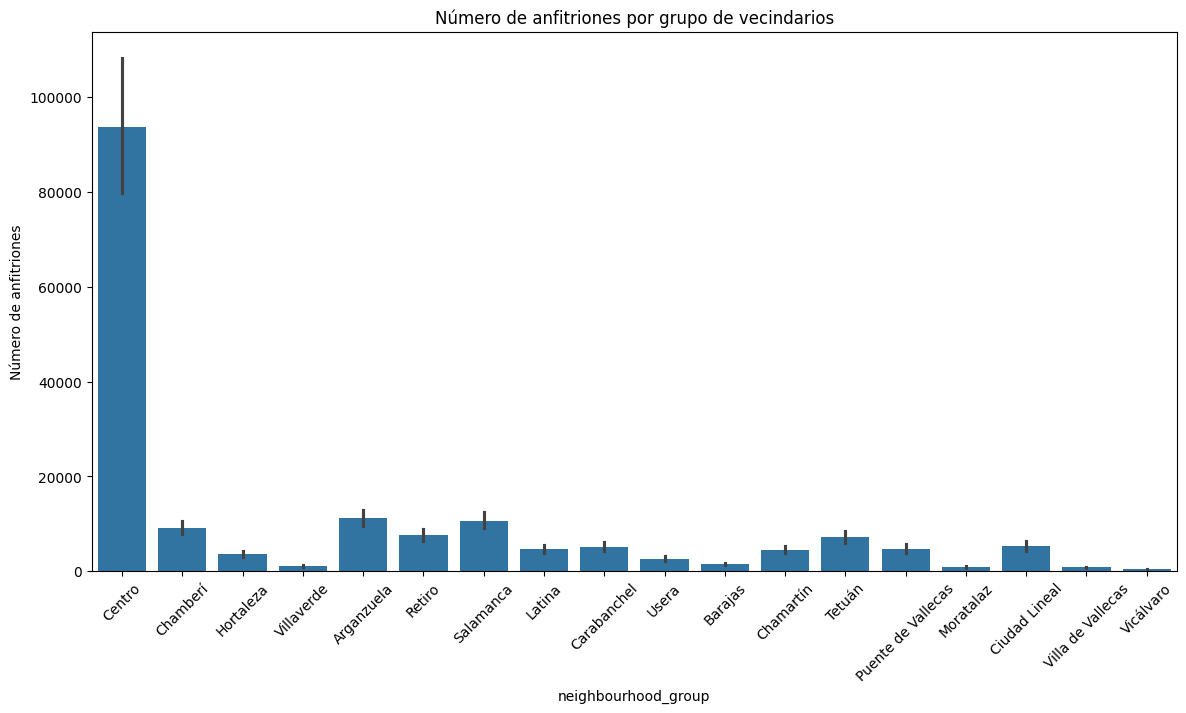

In [25]:
plt.figure(figsize=(14, 7))
sns.barplot(data=data, x='neighbourhood_group', y='hosts_count', estimator=sum)
plt.title('Número de anfitriones por grupo de vecindarios')
plt.xticks(rotation = 45)
plt.ylabel('Número de anfitriones')
plt.show()

4bis. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?

KeyboardInterrupt: 

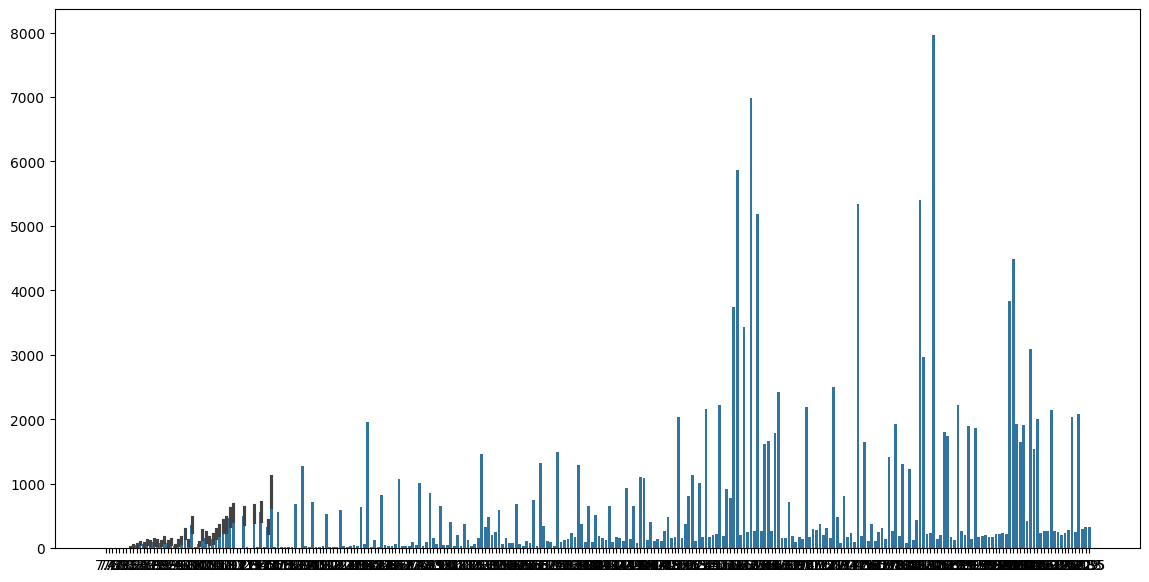

In [45]:
plt.figure(figsize=(14, 7))
sns.barplot(data=data, x='m2_price', y='hosts_count', estimator=sum)
plt.title('Número de anfitriones por grupo de vecindarios')
plt.xlabel('Grupo de Vecindarios')
plt.xticks(rotation = 45)
plt.ylabel('Número de Anfitriones')
plt.show()

5. Crecimiento en precios (nigth_price) entre años (year): lineplot and barplot

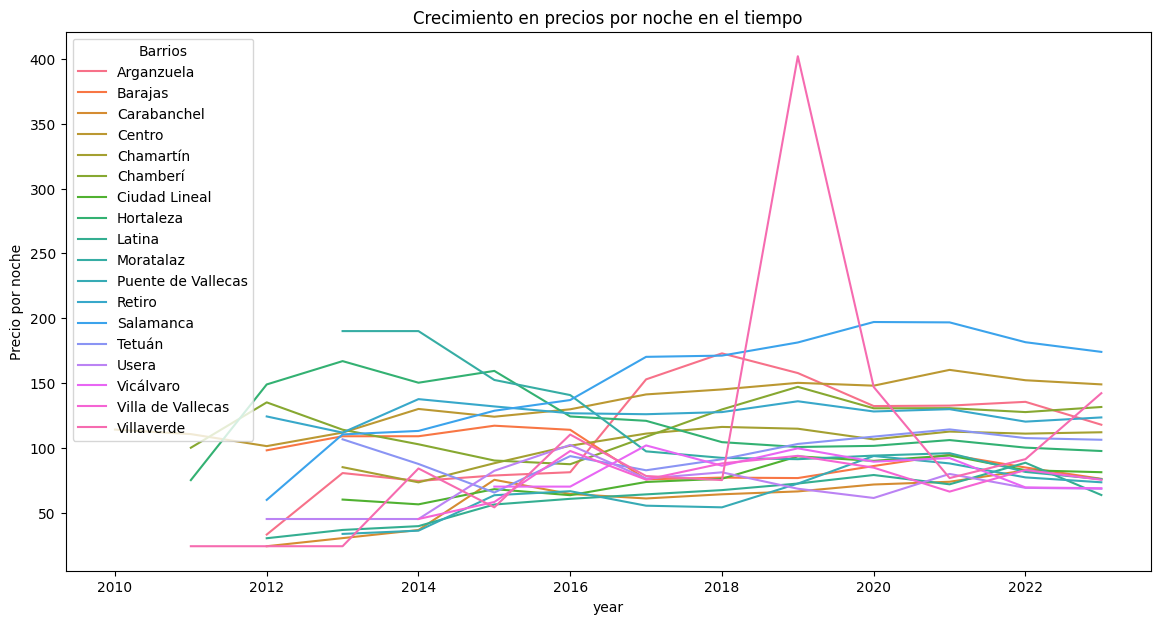

In [ ]:
data['year'] = data['date'].dt.year
price_growth = data.groupby(['neighbourhood_group', 'year'])['nigth_price'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=price_growth, x='year', y='nigth_price', hue='neighbourhood_group')
plt.title('Crecimiento en precios por noche en el tiempo')
plt.ylabel('Precio por noche')
plt.legend(title='Barrios de Madrid')
plt.show()


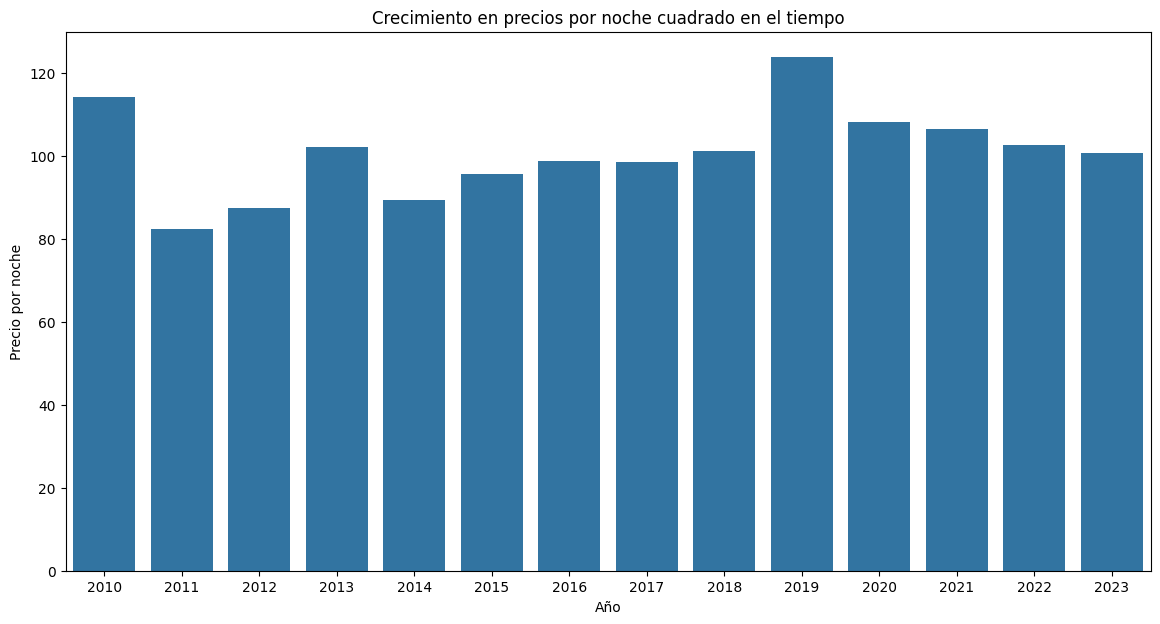

In [49]:
data['year'] = data['date'].dt.year
price_growth = data.groupby(['year'])['nigth_price'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=price_growth, x='year', y='nigth_price')
plt.title('Crecimiento en precios por noche cuadrado en el tiempo')
plt.xlabel('Año')
plt.ylabel('Precio por noche')
plt.show()

6. ¿Qué vecindarios muestran el mayor crecimiento en precios (nigth_price) entre años (year)?

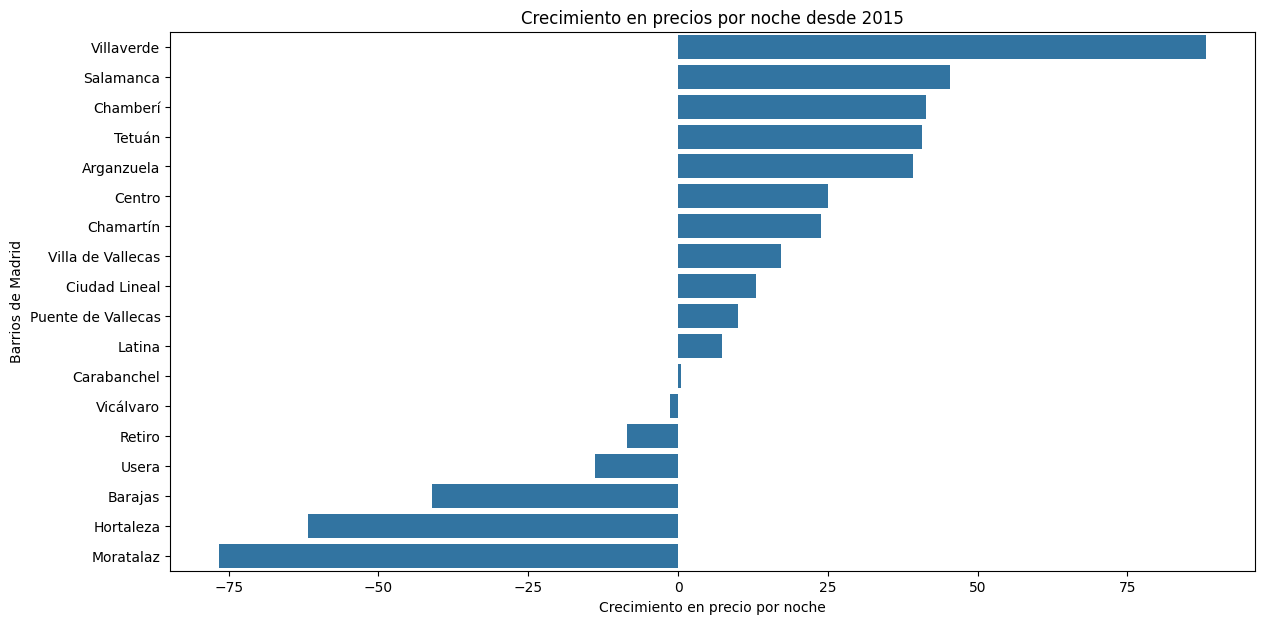

In [125]:
price_growth = data.groupby(['neighbourhood_group', 'year'])['nigth_price'].mean().reset_index()
price_growth = price_growth.pivot(index='neighbourhood_group', columns='year', values='nigth_price')
price_growth['growth'] = price_growth[2023] - price_growth[2015]
price_growth = price_growth.sort_values('growth', ascending=False)
plt.figure(figsize=(14, 7))
sns.barplot(data=price_growth, x='growth', y=price_growth.index)
plt.title('Crecimiento en precios por noche desde 2015')
plt.xlabel('Crecimiento en precio por noche')
plt.ylabel('Barrios de Madrid')
plt.show()

# Modelo de regresión lineal


Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)

In [128]:
data_agg = data.groupby('date').agg({
    'm2_price': 'mean',
    'inflation': 'mean',
    'HICP': 'mean',
    'population_density': 'mean',
    'listings_count': 'sum',
    'minimum_nights': 'mean',
    'nigth_price': 'mean',
    'availability_365': 'mean',
    'listing_reviews': 'sum',
    'number_of_reviews': 'sum',
    'reviews_per_month': 'mean',
    'hosts_count': 'sum',
    'Private_room': 'sum',
    'Entire_home': 'sum',
    'Hotel_room': 'sum',
    'Shared_room': 'sum'
}).reset_index()

X = data_agg[['inflation', 'HICP', 'population_density', 'listings_count', 'minimum_nights', 'nigth_price', 'availability_365', 'listing_reviews', 'number_of_reviews', 'reviews_per_month', 'hosts_count', 'Private_room', 'Entire_home', 'Hotel_room', 'Shared_room']]
y = data_agg['m2_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

model = LinearRegression()
model.fit(X_train, y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print(coef_df)

rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
mae_train = mean_absolute_error(y_train, predictions_train)
mape_train = mean_absolute_percentage_error(y_train, predictions_train)

rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
mae_test = mean_absolute_error(y_test, predictions_test)
mape_test = mean_absolute_percentage_error(y_test, predictions_test)

print(f"El RMSE de train set: {rmse_train}")
print(f"El MAE de train set: {mae_train}")
print(f"El MAPE de train set: {100 * mape_train} %")

print("")

print(f"El RMSE de test set: {rmse_test}")
print(f"El MAE de test set: {mae_test}")
print(f"El MAPE de test set: {100 * mape_test} %")

                    Coeficiente
inflation             -0.068681
HICP                   0.014776
population_density     0.052289
listings_count        -0.005316
minimum_nights         0.000508
nigth_price            0.019174
availability_365       0.004722
listing_reviews        0.000011
number_of_reviews     -0.001252
reviews_per_month      1.466128
hosts_count            0.005323
Private_room           0.002620
Entire_home            0.001757
Hotel_room            -0.017290
Shared_room            0.007598
El RMSE de train set: 0.43409737691548167
El MAE de train set: 0.3030508136493816
El MAPE de train set: 2.3224948700658468 %

El RMSE de test set: 0.49658120486684976
El MAE de test set: 0.37779055690727564
El MAPE de test set: 2.908728546567825 %


# Dashboard

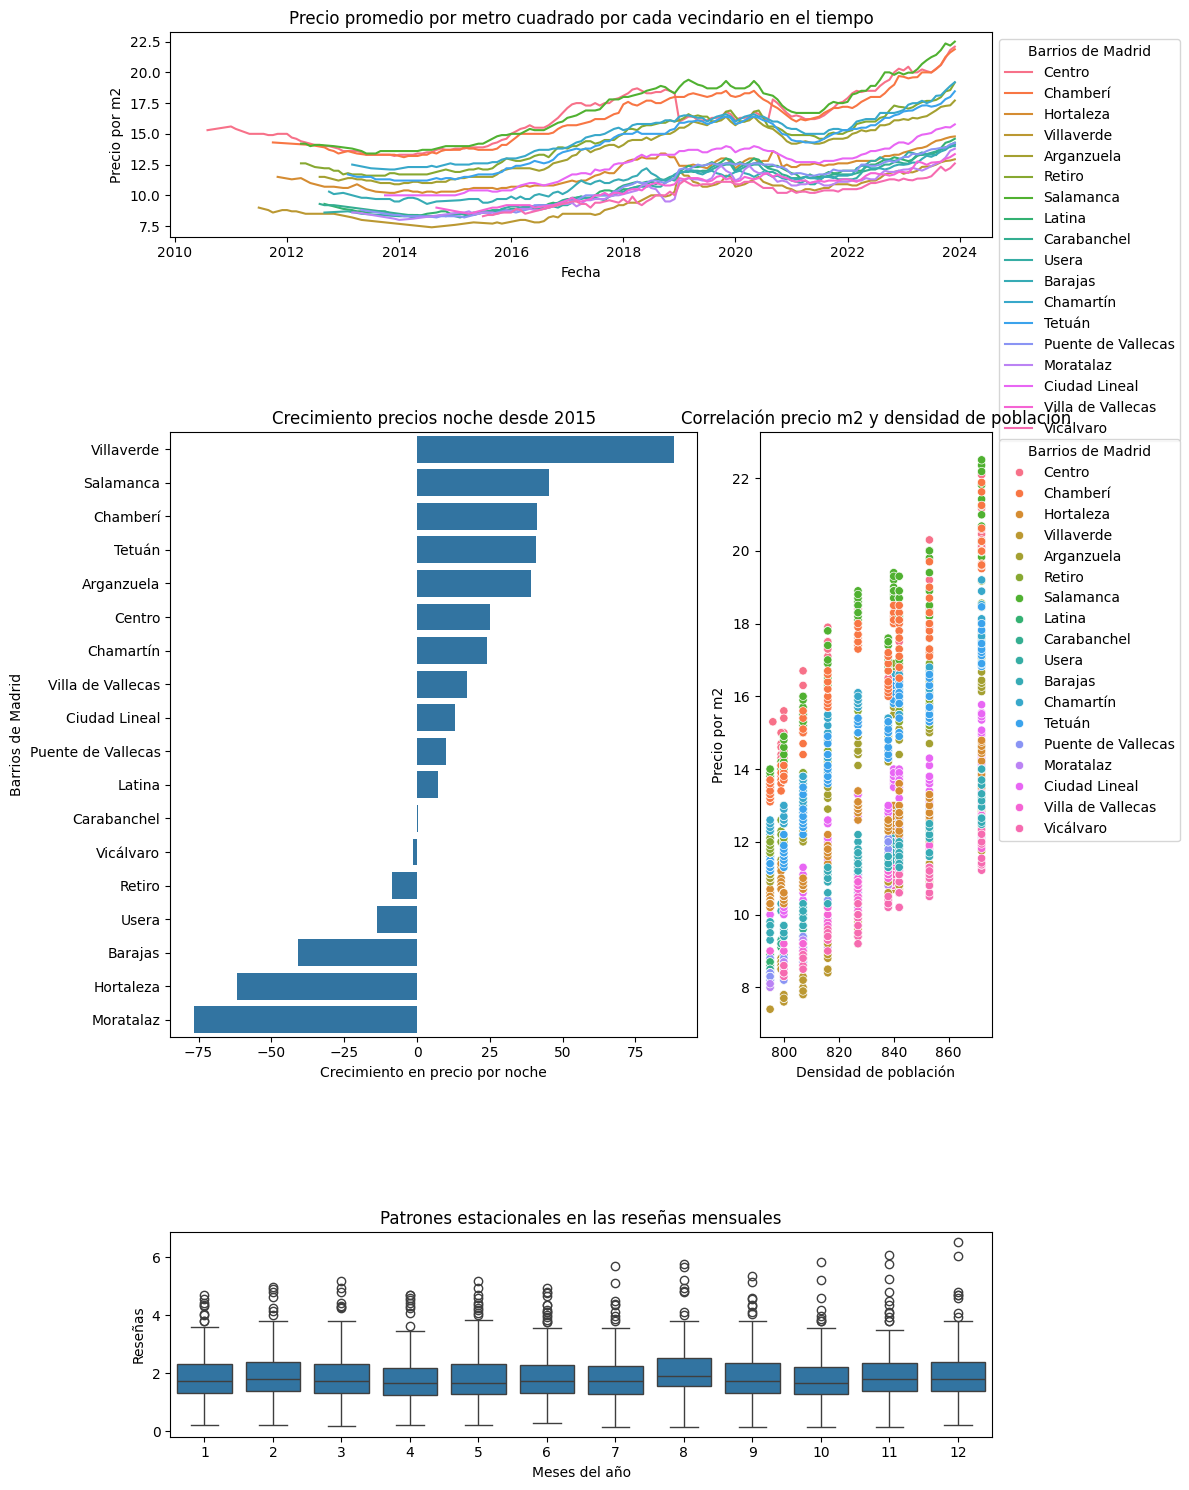

In [126]:
plt.figure(figsize=(12, 15))

plt.subplot2grid((4,3), (0,0), colspan=3)
sns.lineplot(data=data, x='date', y='m2_price', hue='neighbourhood_group')
plt.title('Precio promedio por metro cuadrado por cada vecindario en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio por m2')
plt.legend(title='Barrios de Madrid',bbox_to_anchor=(1, 1, 0, 0))

plt.subplot2grid((4,3), (1,0), colspan=2, rowspan=2)
sns.barplot(data=price_growth, x='growth', y=price_growth.index)
plt.title('Crecimiento precios noche desde 2015')
plt.xlabel('Crecimiento en precio por noche')
plt.ylabel('Barrios de Madrid')

plt.subplot2grid((4,3), (1,2), rowspan=2)
sns.scatterplot(data=data, x='population_density', y='m2_price', hue='neighbourhood_group')
plt.title('Correlación precio m2 y densidad de población')
plt.xlabel('Densidad de población')
plt.ylabel('Precio por m2')
plt.legend(title='Barrios de Madrid', bbox_to_anchor=(1, 1, 0, 0))


plt.subplot2grid((4,3), (3,0), colspan=3)
sns.boxplot(data=data, x='month', y='reviews_per_month')
plt.title('Patrones estacionales en las reseñas mensuales')
plt.xlabel('Meses del año')
plt.ylabel('Reseñas')


plt.tight_layout() # para que no se superpongan las graficas